In [ ]:
!nvidia-smi

Sun Nov 24 21:49:37 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install -q gdown inference-gpu
!pip install -q onnxruntime-gpu==1.18.0 --index-url https://aiinfra.pkgs.visualstudio.com/PublicPackages/_packaging/onnxruntime-cuda-12/pypi/simple/

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.7/105.7 kB 5.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.1/841.1 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 77.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 891.9/891.9 kB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.2/226.2 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install -q git+https://github.com/roboflow/sports.git

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 6.0 MB/s eta 0:00:00


In [ ]:
!pip uninstall -y supervision && pip install -q supervision>=0.23.0

Found existing installation: supervision 0.22.0
Uninstalling supervision-0.22.0:
  Successfully uninstalled supervision-0.22.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inference-gpu 0.28.0 requires supervision<=0.22.0,>=0.21.0, but you have supervision 0.25.0 which is incompatible.


In [ ]:
!pip install pillow

In [ ]:
!gdown -O "Old_sample.mp4" "https://drive.google.com/uc?id=1XlZrz_a3bFMReE3AzZM1QQ2k33Q3N-SP"

Downloading...
From (original): https://drive.google.com/uc?id=1XlZrz_a3bFMReE3AzZM1QQ2k33Q3N-SP
From (redirected): https://drive.google.com/uc?id=1XlZrz_a3bFMReE3AzZM1QQ2k33Q3N-SP&confirm=t&uuid=7653f627-86ac-4be3-a3e9-d2e3e50c8c7a
To: /content/Old_sample.mp4
100% 497M/497M [00:07<00:00, 62.8MB/s]


In [ ]:
import os
os.environ["ONNXRUNTIME_EXECUTION_PROVIDERS"] = "[CUDAExecutionProvider]"

In [ ]:
from inference import get_model
from google.colab import userdata

ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API')
PLAYER_DETECTION_MODEL_ID = "mb-ezds0/1"
PLAYER_DETECTION_MODEL = get_model(model_id=PLAYER_DETECTION_MODEL_ID, api_key=ROBOFLOW_API_KEY)

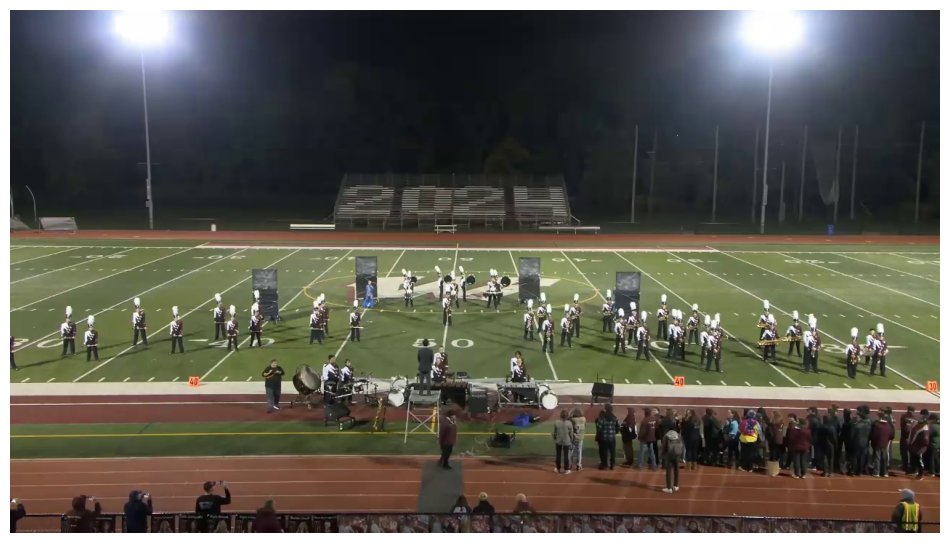

In [ ]:
import supervision as sv

SOURCE_VIDEO_PATH = "/content/Old_sample.mp4"

box_annotator = sv.BoxAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)
label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    text_color=sv.Color.from_hex('#000000')
)

tracker = sv.ByteTrack()
tracker.reset()


frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)


result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.1)[0]
detections = sv.Detections.from_inference(result)
detections = detections.with_nms(threshold=0.5, class_agnostic=True)
#detections.class_id = detections.class_id-1
detections = tracker.update_with_detections(detections)


labels = [
    f"#{tracker_id}"
    for tracker_id
    in detections.tracker_id
]

annotated_frame = frame.copy()
annotated_frame = box_annotator.annotate(annotated_frame, detections)
annotated_frame = label_annotator.annotate(annotated_frame, detections, labels=labels)

sv.plot_image(frame)

In [ ]:
import supervision as sv
from tqdm import tqdm

SOURCE_VIDEO_PATH = "/content/Old_sample.mp4"
TARGET_VIDEO_PATH = "/content/Old_sample_output.mp4"

ellipse_annotator = sv.EllipseAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)
label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    text_color=sv.Color.from_hex('#000000'),
    text_position=sv.Position.BOTTOM_CENTER
)

tracker = sv.ByteTrack()
tracker.reset()

video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
video_sink = sv.VideoSink(TARGET_VIDEO_PATH, video_info=video_info)
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)

with video_sink:
  for frame in tqdm(frame_generator, total=video_info.total_frames):
    result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.1)[0]
    detections = sv.Detections.from_inference(result)


    labels = [
        f"#{tracker_id}"
        for tracker_id
        in detections.tracker_id
    ]

    annotated_frame = frame.copy()
    annotated_frame = box_annotator.annotate(annotated_frame, detections)
    annotated_frame = label_annotator.annotate(annotated_frame, detections, labels=labels)

    video_sink.write_frame(annotated_frame)

100%|██████████| 14438/14438 [21:42<00:00, 11.08it/s]


In [ ]:
from dataclasses import dataclass, field
from typing import List, Tuple
import supervision as sv
from tqdm import tqdm



@dataclass
class FootballPitchConfiguration:
    width: int = 160  # [cm]
    length: int = 360  # [cm]
    end_zone_width: int = 160  # [cm]
    end_zone_length: int = 30  # [cm]
    yard_width: int = 160  # [cm]
    yard_length: int = 15  # [cm]

    @property
    def vertices(self) -> List[Tuple[int, int]]:
        return [
            (0, 0),  # 1
            (0, self.width),  # 2
            (self.end_zone_length, self.width),  # 3
            (self.end_zone_length, 0),  # 4
            (self.end_zone_length+self.yard_length, 0),  # 5
            (self.end_zone_length+self.yard_length, self.width),  # 6
            (self.end_zone_length+self.yard_length*2, self.width), # 7
            (self.end_zone_length+self.yard_length*2, 0),  # 8
            (self.end_zone_length+self.yard_length*3, 0),  # 9
            (self.end_zone_length+self.yard_length*3, self.width),  # 10
            (self.end_zone_length+self.yard_length*4, self.width), # 11
            (self.end_zone_length+self.yard_length*4, 0), # 12
            (self.end_zone_length+self.yard_length*5, 0),  # 13
            (self.end_zone_length+self.yard_length*5, self.width),  # 14
            (self.end_zone_length+self.yard_length*6, self.width), # 15
            (self.end_zone_length+self.yard_length*6, 0), # 16
            (self.end_zone_length+self.yard_length*7, 0),  # 17
            (self.end_zone_length+self.yard_length*7, self.width),  # 18
            (self.end_zone_length+self.yard_length*8, self.width), # 19
            (self.end_zone_length+self.yard_length*8, 0), # 20
            (self.end_zone_length+self.yard_length*9, 0),  # 21
            (self.end_zone_length+self.yard_length*9, self.width),  # 22
            (self.end_zone_length+self.yard_length*10, self.width), # 23
            (self.end_zone_length+self.yard_length*10, 0), # 24
            (self.end_zone_length+self.yard_length*11, 0),  # 25
            (self.end_zone_length+self.yard_length*11, self.width),  # 26
            (self.end_zone_length+self.yard_length*12, self.width), # 27
            (self.end_zone_length+self.yard_length*12, 0), # 28
            (self.end_zone_length+self.yard_length*13, 0),  # 29
            (self.end_zone_length+self.yard_length*13, self.width),  # 30
            (self.end_zone_length+self.yard_length*14, self.width), # 31
            (self.end_zone_length+self.yard_length*14, 0), # 32
            (self.end_zone_length+self.yard_length*15, 0),  # 33
            (self.end_zone_length+self.yard_length*15, self.width),  # 34
            (self.end_zone_length+self.yard_length*16, self.width), # 35
            (self.end_zone_length+self.yard_length*16, 0), # 36
            (self.end_zone_length+self.yard_length*17, 0),  # 37
            (self.end_zone_length+self.yard_length*17, self.width),  # 38
            (self.end_zone_length+self.yard_length*18, self.width), # 39
            (self.end_zone_length+self.yard_length*18, 0), # 40
            (self.end_zone_length+self.yard_length*19, 0),  # 41
            (self.end_zone_length+self.yard_length*19, self.width), # 42
            (self.end_zone_length+self.yard_length*20, self.width), # 43
            (self.end_zone_length+self.yard_length*20, 0), # 44
            (self.length, 0), #45
            (self.length, self.width) #46
        ]

    @property
    def vertices2(self) -> List[Tuple[int, int]]:
      return [
        (self.end_zone_length+self.yard_length*10, self.width), #1
        (self.end_zone_length+self.yard_length*10, 0), #2
        (self.end_zone_length+self.yard_length*8, 0), #3
        (self.end_zone_length+self.yard_length*8, self.width),#4
        (self.end_zone_length+self.yard_length*12, 0), #5
        (self.end_zone_length+self.yard_length*14, 0), #6
        (self.end_zone_length+self.yard_length*14, self.width), #7
        (self.end_zone_length+self.yard_length*12, self.width), #8
        (self.end_zone_length+self.yard_length*7, self.width), #9
        (self.end_zone_length+self.yard_length*7, 0) #10
    ]

    edges: List[Tuple[int, int]] = field(default_factory=lambda: [
         (1, 2), (2, 3), (3, 4), (4, 5), (1,4), (5,6), (6,3), (7, 8), (6, 7), (8, 5), (8,9), (9,10), (10, 11), (11,12), (7,10), (9,12), (12, 13), (13, 14), (14, 15), (15, 16), (11, 14), (13, 16), (16, 17), (17, 18), (18, 19), (19, 20), (20, 21), (21, 22), (22, 23), (23, 24), (24, 25), (25, 26), (26, 27), (27, 28), (28, 29), (29, 30), (30, 31), (31, 32), (15, 18), (17, 20), (19, 22), (21, 24), (23, 26), (25, 28), (27, 30), (29, 32), (32, 33), (33, 34), (34, 35), (35, 36), (36, 37), (37, 38), (38, 39), (39, 40), (40, 41), (41, 42), (31, 34), (33, 36), (35, 38), (37, 40), (39, 42), (42, 43), (43, 44), (41, 44), (44, 45), (45, 46), (43, 46)])

    edges2: List[Tuple[int, int]] = field(default_factory=lambda: [
          (10, 9), (9, 4), (4,3), (3, 2), (2,1), (1, 8), (8, 5), (5, 6), (6, 7), (4, 8), (2, 5), (10, 3), (7, 8)])

    labels: List[str] = field(default_factory=lambda: [
        "01", "02", "03", "04", "05", "06", "07", "08", "09", "10",
        "11", "12", "13", "15", "16", "17", "18", "20", "21", "22",
        "23", "24", "25", "26", "27", "28", "29", "30", "31", "32",
        "14", "19"
    ])

    colors: List[str] = field(default_factory=lambda: [
        "#FF1493", "#FF1493", "#FF1493", "#FF1493", "#FF1493", "#FF1493",
        "#FF1493", "#FF1493", "#FF1493", "#FF1493", "#FF1493", "#FF1493",
        "#FF1493", "#00BFFF", "#00BFFF", "#00BFFF", "#00BFFF", "#FF6347",
        "#FF6347", "#FF6347", "#FF6347", "#FF6347", "#FF6347", "#FF6347",
        "#FF6347", "#FF6347", "#FF6347", "#FF6347", "#FF6347", "#FF6347",
        "#00BFFF", "#00BFFF"
    ])

In [ ]:
import numpy as np
import cv2
from typing import Optional

def draw_pitch(
    config: FootballPitchConfiguration,
    background_color: sv.Color = sv.Color(34, 139, 34),
    line_color: sv.Color = sv.Color.WHITE,
    padding: int = 50,
    line_thickness: int = 4,
    point_radius: int = 8,
    scale: float = 5,
    asthetic: bool=False
) -> np.ndarray:
    """
    Draws a Football pitch with specified dimensions, colors, and scale.

    Args:
        config (FootballPitchConfiguration): Configuration object containing the
            dimensions and layout of the pitch.
        background_color (sv.Color, optional): Color of the pitch background.
            Defaults to sv.Color(34, 139, 34).
        line_color (sv.Color, optional): Color of the pitch lines.
            Defaults to sv.Color.WHITE.
        padding (int, optional): Padding around the pitch in pixels.
            Defaults to 50.
        line_thickness (int, optional): Thickness of the pitch lines in pixels.
            Defaults to 4.
        point_radius (int, optional): Radius of the penalty spot points in pixels.
            Defaults to 8.
        scale (float, optional): Scaling factor for the pitch dimensions.
            Defaults to 0.1.

    Returns:
        np.ndarray: Image of the soccer pitch.
    """
    scaled_width = int(config.width * scale)
    scaled_length = int(config.length * scale)

    pitch_image = np.ones(
        (scaled_width + 2 * padding,
         scaled_length + 2 * padding, 3),
        dtype=np.uint8
    ) * np.array(background_color.as_bgr(), dtype=np.uint8)

    if not asthetic:
      for start, end in config.edges2:
          point1 = (int(config.vertices2[start - 1][0] * scale) + padding,
                    int(config.vertices2[start - 1][1] * scale) + padding)
          point2 = (int(config.vertices2[end - 1][0] * scale) + padding,
                    int(config.vertices2[end - 1][1] * scale) + padding)
          cv2.line(
              img=pitch_image,
              pt1=point1,
              pt2=point2,
              color=line_color.as_bgr(),
              thickness=line_thickness
          )
    else:
      for start, end in config.edges:
          point1 = (int(config.vertices[start - 1][0] * scale) + padding,
                    int(config.vertices[start - 1][1] * scale) + padding)
          point2 = (int(config.vertices[end - 1][0] * scale) + padding,
                    int(config.vertices[end - 1][1] * scale) + padding)
          cv2.line(
              img=pitch_image,
              pt1=point1,
              pt2=point2,
              color=line_color.as_bgr(),
              thickness=line_thickness
          )

    return pitch_image

def draw_points_on_pitch(
    config: FootballPitchConfiguration,
    xy: np.ndarray,
    face_color: sv.Color = sv.Color.RED,
    edge_color: sv.Color = sv.Color.BLACK,
    radius: int = 10,
    thickness: int = 2,
    padding: int = 50,
    scale: float = 5,
    pitch: Optional[np.ndarray] = None
) -> np.ndarray:
    """
    Draws points on a soccer pitch.

    Args:
        config (SoccerPitchConfiguration): Configuration object containing the
            dimensions and layout of the pitch.
        xy (np.ndarray): Array of points to be drawn, with each point represented by
            its (x, y) coordinates.
        face_color (sv.Color, optional): Color of the point faces.
            Defaults to sv.Color.RED.
        edge_color (sv.Color, optional): Color of the point edges.
            Defaults to sv.Color.BLACK.
        radius (int, optional): Radius of the points in pixels.
            Defaults to 10.
        thickness (int, optional): Thickness of the point edges in pixels.
            Defaults to 2.
        padding (int, optional): Padding around the pitch in pixels.
            Defaults to 50.
        scale (float, optional): Scaling factor for the pitch dimensions.
            Defaults to 0.1.
        pitch (Optional[np.ndarray], optional): Existing pitch image to draw points on.
            If None, a new pitch will be created. Defaults to None.

    Returns:
        np.ndarray: Image of the soccer pitch with points drawn on it.
    """
    if pitch is None:
        pitch = draw_pitch(
            config=config,
            padding=padding,
            scale=scale
        )

    for point in xy:
        scaled_point = (
            int(point[0] * scale) + padding,
            int(point[1] * scale) + padding
        )
        cv2.circle(
            img=pitch,
            center=scaled_point,
            radius=radius,
            color=face_color.as_bgr(),
            thickness=-1
        )
        cv2.circle(
            img=pitch,
            center=scaled_point,
            radius=radius,
            color=edge_color.as_bgr(),
            thickness=thickness
        )

    return pitch

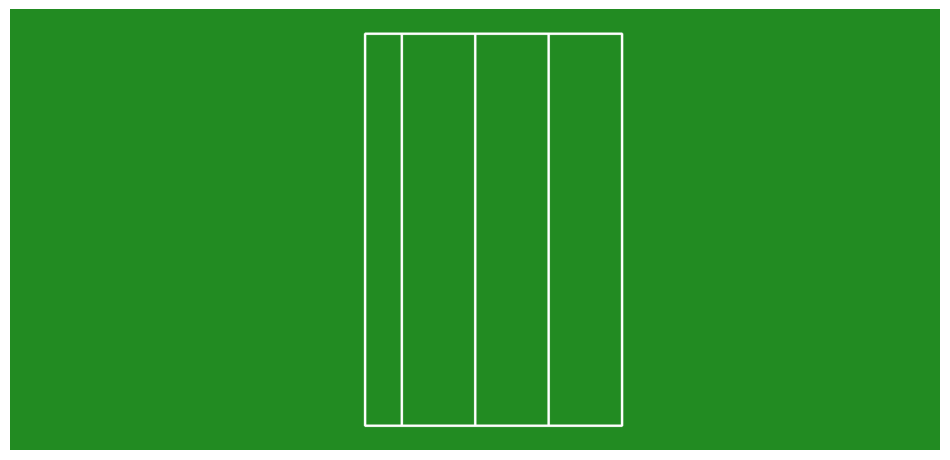

In [ ]:
CONFIG = FootballPitchConfiguration()
CONFIG_ASTHETIC = FootballPitchConfiguration()

annotated_frame = draw_pitch(CONFIG)

sv.plot_image(annotated_frame)

In [ ]:
from inference import get_model
from google.colab import userdata

ROBOFLOW_API=userdata.get('ROBOFLOW_API_KEY')
PITCH_DETECTION_MODEL_ID = "keypoints-ppgvd/5"
PITCH_DETECTION_MODEL = get_model(PITCH_DETECTION_MODEL_ID, ROBOFLOW_API)

SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


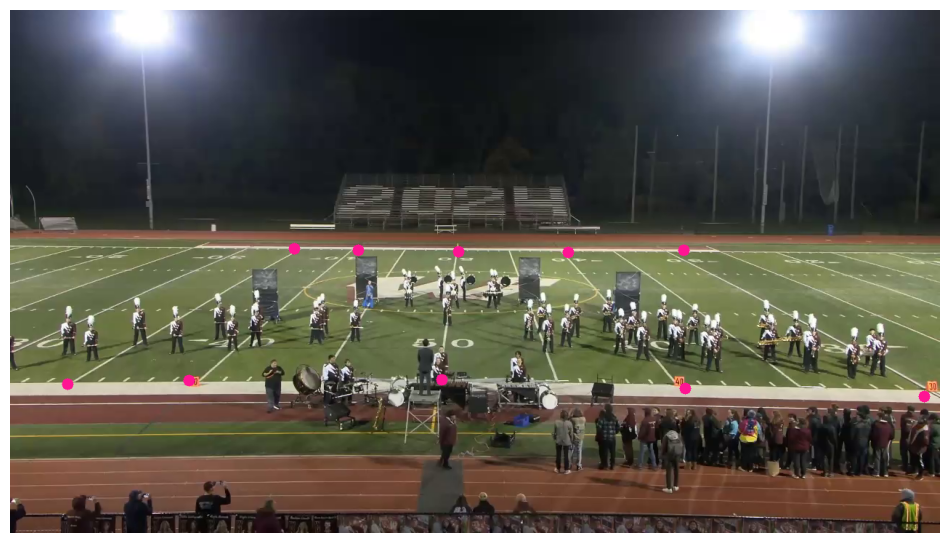

In [ ]:
import supervision as sv

SOURCE_VIDEO_PATH = "/content/Old_sample.mp4"

vertex_annotator = sv.VertexAnnotator(
    color=sv.Color.from_hex('#FF1493'),
    radius=8)

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

result = PITCH_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
key_points = sv.KeyPoints.from_inference(result)

annotated_frame = frame.copy()
annotated_frame = vertex_annotator.annotate(
    scene=annotated_frame,
    key_points=key_points)

sv.plot_image(annotated_frame)

In [ ]:
class ViewTransformer:

  def __init__(self, source: np.ndarray, target: np.ndarray):
    source = source.astype(np.float32)
    target = target.astype(np.float32)
    self.m, _ = cv2.findHomography(source, target)
  def transform_points(self, points: np.ndarray) -> np.ndarray:
    points = points.reshape(-1, 1, 2).astype(np.float32)
    points = cv2.perspectiveTransform(points, self.m)
    return points.reshape(-1, 2).astype(np.float32)

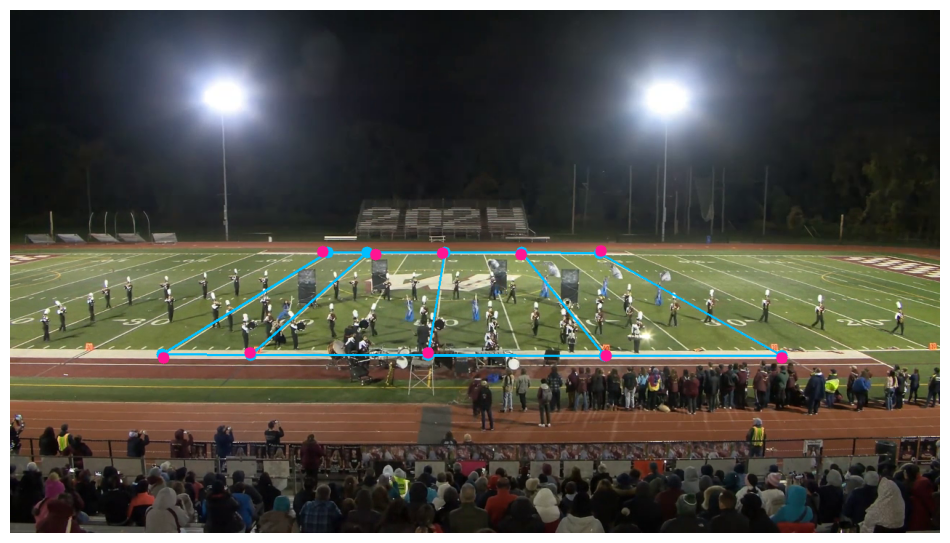

In [ ]:
import numpy as np
import supervision as sv

SOURCE_VIDEO_PATH = "/content/Old_sample.mp4"

edge_annotator = sv.EdgeAnnotator(
    color=sv.Color.from_hex('#00BFFF'),
    thickness=2, edges=CONFIG.edges2)
vertex_annotator = sv.VertexAnnotator(
    color=sv.Color.from_hex('#FF1493'),
    radius=8)
vertex_annotator_2 = sv.VertexAnnotator(
    color=sv.Color.from_hex('#00BFFF'),
    radius=8)

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH, start=7533)
frame = next(frame_generator)

result = PITCH_DETECTION_MODEL.infer(frame, confidence=0.5)[0]
key_points = sv.KeyPoints.from_inference(result)

filter = key_points.confidence[0] > 0.5
frame_reference_points = key_points.xy[0][filter]
frame_reference_key_points = sv.KeyPoints(
    xy=frame_reference_points[np.newaxis, ...])

pitch_reference_points = np.array(CONFIG.vertices2)[filter]
transformer = ViewTransformer(
    source=pitch_reference_points,
    target=frame_reference_points
)

pitch_all_points = np.array(CONFIG.vertices2)
frame_all_points = transformer.transform_points(points=pitch_all_points)

frame_all_key_points = sv.KeyPoints(xy=frame_all_points[np.newaxis, ...])

annotated_frame = frame.copy()
annotated_frame = edge_annotator.annotate(
    scene=annotated_frame,
    key_points=frame_all_key_points)
annotated_frame = vertex_annotator_2.annotate(
    scene=annotated_frame,
    key_points=frame_all_key_points)
annotated_frame = vertex_annotator.annotate(
    scene=annotated_frame,
    key_points=frame_reference_key_points)

sv.plot_image(annotated_frame)

In [ ]:
box_annotator = sv.BoxAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)
label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    text_color=sv.Color.from_hex('#000000')
)

tracker = sv.ByteTrack()
tracker.reset()


frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)


result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.1)[0]
detections = sv.Detections.from_inference(result)
detections = detections.with_nms(threshold=0.5, class_agnostic=True)
#detections.class_id = detections.class_id-1
detections = tracker.update_with_detections(detections)


labels = [
    f"#{tracker_id}"
    for tracker_id
    in detections.tracker_id
]

annotated_frame = frame.copy()
annotated_frame = box_annotator.annotate(annotated_frame, detections)
annotated_frame = label_annotator.annotate(annotated_frame, detections, labels=labels)

sv.plot_image(annotated_frame)

In [ ]:
from inference import get_model
from google.colab import userdata

ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API')
PLAYER_DETECTION_MODEL_ID = "mb-ezds0/1"
PLAYER_DETECTION_MODEL = get_model(model_id=PLAYER_DETECTION_MODEL_ID, api_key=ROBOFLOW_API_KEY)

ROBOFLOW_API=userdata.get('ROBOFLOW_API')
PITCH_DETECTION_MODEL_ID = "keypoints-ppgvd/5"
PITCH_DETECTION_MODEL = get_model(PITCH_DETECTION_MODEL_ID, ROBOFLOW_API)

In [ ]:
import supervision as sv
from tqdm import tqdm

SOURCE_VIDEO_PATH = "/content/Old_sample.mp4"
TARGET_VIDEO_PATH = "/content/Old_sample_output1.mp4"


tracker = sv.ByteTrack()
tracker.reset()

video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
video_sink = sv.VideoSink(TARGET_VIDEO_PATH, video_info=video_info)
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
i=0

with video_sink:
  for frame in tqdm(frame_generator, total=video_info.total_frames):
    try:
      result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.1)[0]
      detections = sv.Detections.from_inference(result)
      detections = detections.with_nms(threshold=0.5, class_agnostic=True)
      detections = tracker.update_with_detections(detections)


      labels = [
          f"#{tracker_id}"
          for tracker_id
          in detections.tracker_id
      ]

      result = PITCH_DETECTION_MODEL.infer(frame, confidence=0.5)[0]
      key_points = sv.KeyPoints.from_inference(result)

      filter = key_points.confidence[0] > 0.5
      frame_reference_points = key_points.xy[0][filter]

      pitch_reference_points = np.array(CONFIG.vertices2)[filter]
      transformer = ViewTransformer(
          source=frame_reference_points,
          target=pitch_reference_points
      )

      players_xy = detections.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)
      pitch_players_xy = transformer.transform_points(points=players_xy)

      pitch = draw_pitch(config=CONFIG, asthetic=True)
      pitch = draw_points_on_pitch(
          config=CONFIG,
          xy=pitch_players_xy,
          face_color=sv.Color.from_hex('00BFFF'),
      edge_color=sv.Color.BLACK,
      radius=10,
      pitch=pitch)
    except:
      errors = []
      errors.append(frame)
      i+=1
      pitch=draw_pitch(config=CONFIG, asthetic=True)

    video_sink.write_frame(pitch)

  0%|          | 0/14438 [00:00<?, ?it/s]


NameError: name 'draw_pitch' is not defined

In [ ]:
import supervision as sv
from tqdm import tqdm

SOURCE_VIDEO_PATH = "/content/Old_sample.mp4"
TARGET_VIDEO_PATH = "/content/Old_sample_output1.mp4"


tracker = sv.ByteTrack()
tracker.reset()

video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
video_sink = sv.VideoSink(TARGET_VIDEO_PATH, video_info=video_info)
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
i=0

with video_sink:
  for frame in tqdm(frame_generator, total=video_info.total_frames):
    result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.1)[0]
    detections = sv.Detections.from_inference(result)
    detections = detections.with_nms(threshold=0.5, class_agnostic=True)
    #detections.class_id = detections.class_id-1
    detections = tracker.update_with_detections(detections)


    labels = [
        f"#{tracker_id}"
        for tracker_id
        in detections.tracker_id
    ]

    result = PITCH_DETECTION_MODEL.infer(frame, confidence=0.5)[0]
    key_points = sv.KeyPoints.from_inference(result)

    try:
      filter = key_points.confidence[0] > 0.5
      frame_reference_points = key_points.xy[0][filter]
      pitch_reference_points = np.array(CONFIG.vertices2)[filter]
      transformer = ViewTransformer(
          source=frame_reference_points,
          target=pitch_reference_points
      )

      players_xy = detections.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)
      pitch_players_xy = transformer.transform_points(points=players_xy)

      pitch = draw_pitch(config=CONFIG, asthetic=True)
      pitch = draw_points_on_pitch(
          config=CONFIG,
          xy=pitch_players_xy,
          face_color=sv.Color.from_hex('00BFFF'),
      edge_color=sv.Color.BLACK,
      radius=10,
      pitch=pitch)
    except:
      pitch=draw_pitch(config=CONFIG, asthetic=True)
    video_sink.write_frame(pitch)

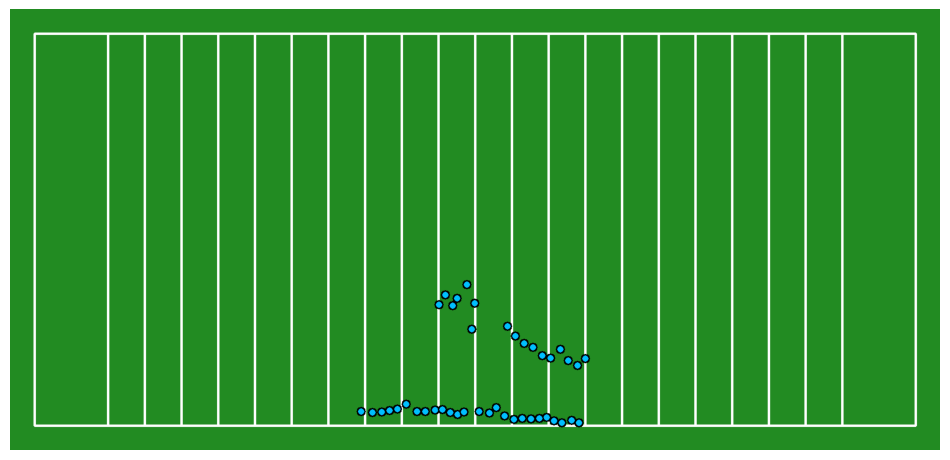

0


In [ ]:
import supervision as sv
from tqdm import tqdm

SOURCE_VIDEO_PATH = "/content/Old_sample.mp4"
TARGET_VIDEO_PATH = "/content/Old_sample_output.mp4"


tracker = sv.ByteTrack()
tracker.reset()

video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
video_sink = sv.VideoSink(TARGET_VIDEO_PATH, video_info=video_info)
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH, start=1200)

frame=next(frame_generator)
i=0

try:
  result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.1)[0]
  detections = sv.Detections.from_inference(result)
  detections = detections.with_nms(threshold=0.5, class_agnostic=True)
  #detections.class_id = detections.class_id-1
  detections = tracker.update_with_detections(detections)


  labels = [
      f"#{tracker_id}"
      for tracker_id
      in detections.tracker_id
  ]

  result = PITCH_DETECTION_MODEL.infer(frame, confidence=0.5)[0]
  key_points = sv.KeyPoints.from_inference(result)

  filter = key_points.confidence[0] > 0.5
  frame_reference_points = key_points.xy[0][filter]

  pitch_reference_points = np.array(CONFIG.vertices2)[filter]
  transformer = ViewTransformer(
      source=frame_reference_points,
      target=pitch_reference_points
  )

  players_xy = detections.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)
  pitch_players_xy = transformer.transform_points(points=players_xy)

  pitch = draw_pitch(config=CONFIG, asthetic=True)
  pitch = draw_points_on_pitch(
      config=CONFIG,
      xy=pitch_players_xy,
      face_color=sv.Color.from_hex('00BFFF'),
  edge_color=sv.Color.BLACK,
  radius=8,
  pitch=pitch)
except:
  errors = []
  errors.append(frame)
  pitch=pitch
  i+=1
sv.plot_image(pitch)
print(i)

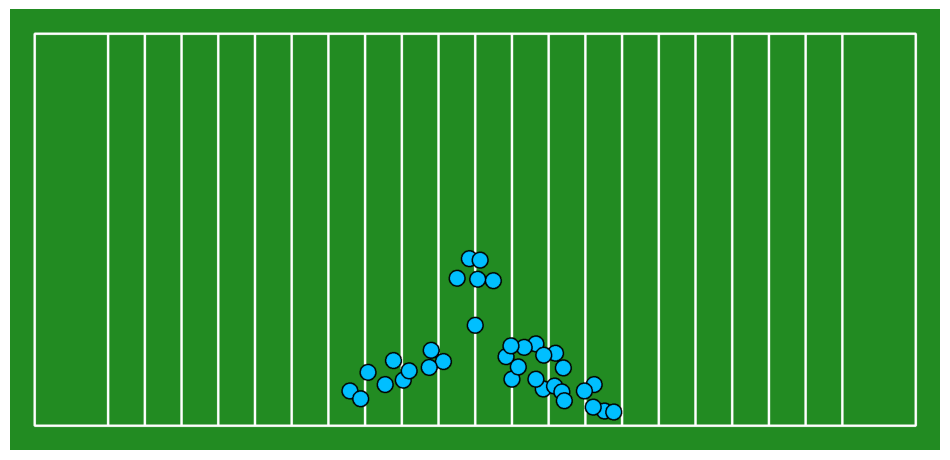

In [ ]:
import supervision as sv
from tqdm import tqdm

SOURCE_VIDEO_PATH = "/content/Old_sample.mp4"
TARGET_VIDEO_PATH = "/content/Old_sample_output.mp4"

video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
video_sink = sv.VideoSink(TARGET_VIDEO_PATH, video_info=video_info)
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)

frame=next(frame_generator)
i=0

result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.1)[0]
detections = sv.Detections.from_inference(result)
detections = detections.with_nms(threshold=0.5, class_agnostic=True)
#detections.class_id = detections.class_id-1
detections = tracker.update_with_detections(detections)


labels = [
    f"#{tracker_id}"
    for tracker_id
    in detections.tracker_id
]

result = PITCH_DETECTION_MODEL.infer(frame, confidence=0.5)[0]
key_points = sv.KeyPoints.from_inference(result)

filter = key_points.confidence[0] > 0.5
frame_reference_points = key_points.xy[0][filter]

pitch_reference_points = np.array(CONFIG.vertices2)[filter]
transformer = ViewTransformer(
    source=frame_reference_points,
    target=pitch_reference_points
)

players_xy = detections.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)
pitch_players_xy = transformer.transform_points(points=players_xy)

pitch = draw_pitch(config=CONFIG, asthetic=True)
pitch = draw_points_on_pitch(
    config=CONFIG,
    xy=pitch_players_xy,
    face_color=sv.Color.from_hex('00BFFF'),
edge_color=sv.Color.BLACK,
radius=16,
pitch=pitch)
sv.plot_image(pitch)